In [1]:
pip install findspark

Note: you may need to restart the kernel to use updated packages.


In [2]:
import findspark
findspark.init('spark-3.5.1-bin-hadoop3')

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName("Análises Covid").config("spark.jars.packages", "com.datastax.spark:spark-cassandra-connector_2.12:3.5.1").config("spark.cassandra.connection.host", "cassandra1").config("spark.cassandra.connection.port", "9042").getOrCreate()

In [5]:
print(spark.version)

3.5.1


In [6]:
df = spark.read.format("org.apache.spark.sql.cassandra").options(table="total_population_by_city_in_ba", keyspace="analises_covid").load()

In [7]:
df.show()

+--------------------+--------------------+----------------+
|                uuid|           city_name|population_40_59|
+--------------------+--------------------+----------------+
|b2589180-a6e7-43e...|Capela do Alto Al...|            3001|
|8e2b5a7e-d6b1-437...| Wenceslau Guimarães|            5947|
|2432d174-a9fa-4a3...|         Cravolândia|            1200|
|00c17d90-0be2-4ae...|           Paramirim|            5505|
|a14b89a4-221d-43d...|            Condeúba|            4632|
|4d07f88c-a6c9-4c8...|             Aiquara|            1162|
|85170ae4-327a-489...|            Jandaíra|            2203|
|1ce76976-9c21-4aa...|               Abaré|            4010|
|3ffa144c-2047-462...|               Irará|            7435|
|00b89430-e4ea-470...|       Campo Formoso|           17748|
|40faf5a5-b18c-49d...|          Entre Rios|           10014|
|90b52d5f-a3b3-40a...|        Simões Filho|           31294|
|a3473068-3dcd-44c...|             Candiba|            3540|
|8490be65-54da-4fc...|  

In [8]:
araci_df = df.filter(df.city_name == 'Araci')

In [9]:
araci_df.show()

+--------------------+---------+----------------+
|                uuid|city_name|population_40_59|
+--------------------+---------+----------------+
|363be551-c315-477...|    Araci|           11632|
+--------------------+---------+----------------+



In [10]:
df2 = spark.read.format("org.apache.spark.sql.cassandra").options(table="vaccinated_people_by_city_in_ba", keyspace="analises_covid").load()

In [11]:
df2.show()

+--------------------+--------------------+--------------------------+
|                uuid|           city_name|vaccinated_people_d1_40_59|
+--------------------+--------------------+--------------------------+
|8b78c3f2-7c96-4d8...|             Arataca|                       614|
|7901cf32-7f35-415...|       Nova Redenção|                      1724|
|9323ecf7-39a7-4c2...|           Lajedinho|                       868|
|d7d0d961-5b99-455...|  Regionais de Saúde|                   3642294|
|4fd2f9eb-be48-48e...|            Santaluz|                      8339|
|2a8c7858-4d35-461...|Livramento de Nos...|                     11928|
|241ca317-1c7c-4a7...|Luís Eduardo Maga...|                     18807|
|92c48ff1-42f8-426...|        Dias d'Ávila|                     18461|
|9e201598-a49e-49b...|               Cairu|                      4264|
|1e3ab95a-a588-47f...|   Marcionílio Souza|                      1955|
|65112e8d-cb59-497...|         Brejolândia|                      2680|
|ac16d

In [12]:
araci_vaccinated = df2.filter(df2.city_name == 'Araci')

In [13]:
araci_vaccinated.show()

+--------------------+---------+--------------------------+
|                uuid|city_name|vaccinated_people_d1_40_59|
+--------------------+---------+--------------------------+
|690eb57d-1788-4fc...|    Araci|                     10942|
+--------------------+---------+--------------------------+



In [15]:
araci_vaccinated_total = araci_vaccinated.select("vaccinated_people_d1_40_59")

In [16]:
araci_vaccinated_total.show()

+--------------------------+
|vaccinated_people_d1_40_59|
+--------------------------+
|                     10942|
+--------------------------+



In [17]:
araci_d1_total = araci_vaccinated_total.collect()[0][0]
print(araci_d1_total)

10942


In [18]:
araci_total = df.filter(df.city_name == 'Araci')

In [19]:
araci_total.show()

+--------------------+---------+----------------+
|                uuid|city_name|population_40_59|
+--------------------+---------+----------------+
|363be551-c315-477...|    Araci|           11632|
+--------------------+---------+----------------+



In [20]:
araci_population = araci_total.select("population_40_59")

In [21]:
araci_population.show()

+----------------+
|population_40_59|
+----------------+
|           11632|
+----------------+



In [22]:
araci_population_total = araci_population.collect()[0][0]

In [23]:
print(araci_population_total)

11632


In [24]:
print(type(araci_population_total))

<class 'int'>


In [27]:
araci_percentage = araci_d1_total / araci_population_total * 100

In [28]:
print(araci_percentage)

94.06808803301237


In [29]:
salvador_df = df.filter(df.city_name == 'Salvador')

In [30]:
salvador_df.show()

+--------------------+---------+----------------+
|                uuid|city_name|population_40_59|
+--------------------+---------+----------------+
|0ce54abd-6f6c-432...| Salvador|          725758|
+--------------------+---------+----------------+



In [31]:
salvador_vaccinated = df2.filter(df2.city_name == 'Salvador')

In [32]:
salvador_vaccinated.show()

+--------------------+---------+--------------------------+
|                uuid|city_name|vaccinated_people_d1_40_59|
+--------------------+---------+--------------------------+
|9ab4e1ad-a3ed-4ed...| Salvador|                    801369|
+--------------------+---------+--------------------------+



In [33]:
salvador_d1_total = salvador_vaccinated.select("vaccinated_people_d1_40_59").collect()[0][0]

In [34]:
print(salvador_d1_total)

801369


In [35]:
salvador_population_total = salvador_df.select("population_40_59").collect()[0][0]

In [36]:
print(salvador_population_total)

725758


In [37]:
salvador_percentage = salvador_d1_total / salvador_population_total * 100

In [38]:
print(salvador_percentage)

110.4182110290207


In [39]:
print(salvador_percentage)
print(araci_percentage)

110.4182110290207
94.06808803301237


In [40]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [41]:
import matplotlib.pyplot as plt

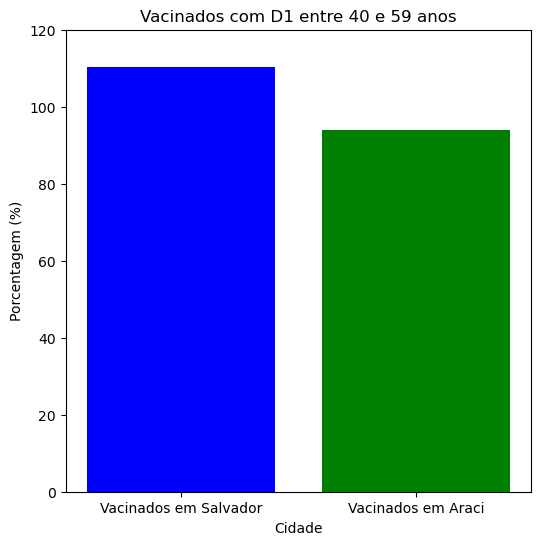

In [44]:
labels = ['Vacinados em Salvador', 'Vacinados em Araci']
percentages = [salvador_percentage, araci_percentage]

plt.figure(figsize=(6, 6))
plt.bar(labels, percentages, color=['blue', 'green'])
plt.title('Vacinados com D1 entre 40 e 59 anos')
plt.xlabel('Cidade')
plt.ylabel('Porcentagem (%)')
plt.ylim(0, 120)
plt.show()

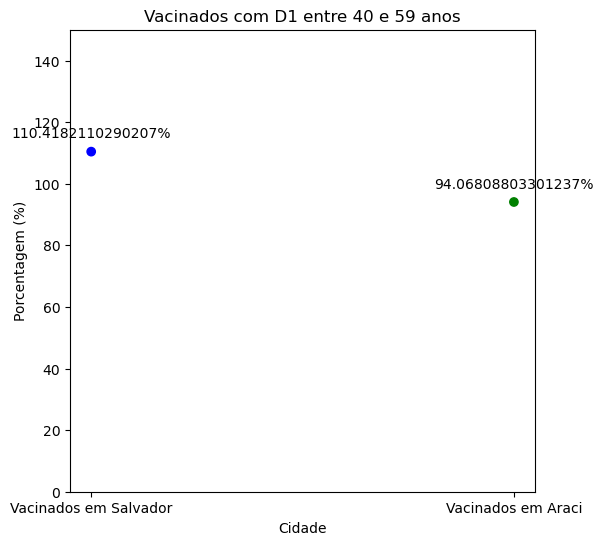

In [48]:
labels = ['Vacinados em Salvador', 'Vacinados em Araci']
percentages = [salvador_percentage, araci_percentage]

plt.figure(figsize=(6, 6))
plt.scatter(labels, percentages, color=['blue', 'green'])

for i, percentage in enumerate(percentages):
    plt.annotate(f'{percentage}%', (labels[i], percentages[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Vacinados com D1 entre 40 e 59 anos')
plt.xlabel('Cidade')
plt.ylabel('Porcentagem (%)')
plt.ylim(0, 150)
plt.show()